In [81]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np 
from scipy.signal import find_peaks
sns.set_style("darkgrid")


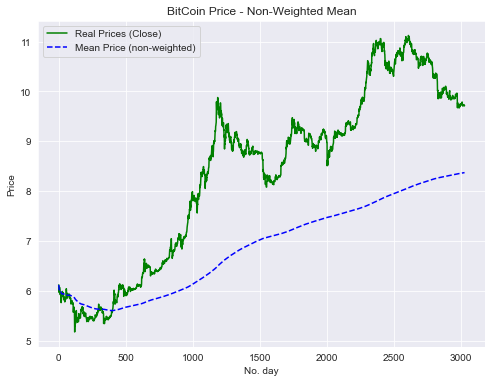

In [82]:
entire_data = pd.read_csv("./Bitcoin.csv").to_dict(orient="index")

RealValuesPlot = []
MeanValuesPlot = []
CountToNow = 0
TotalSum = 0
for item in entire_data.values():
    new_price = np.log(item["Close"])
    TotalSum += new_price
    CountToNow += 1 
    MeanValuesPlot.append(TotalSum/CountToNow)
    RealValuesPlot.append(new_price)
    
plt.plot(RealValuesPlot,"-",label="Real Prices (Close)",color="Green")
plt.plot(MeanValuesPlot,"--",label="Mean Price (non-weighted)",color="Blue")
plt.legend()
plt.title("BitCoin Price - Non-Weighted Mean")
plt.ylabel("Price")
plt.xlabel("No. day")
plt.show()


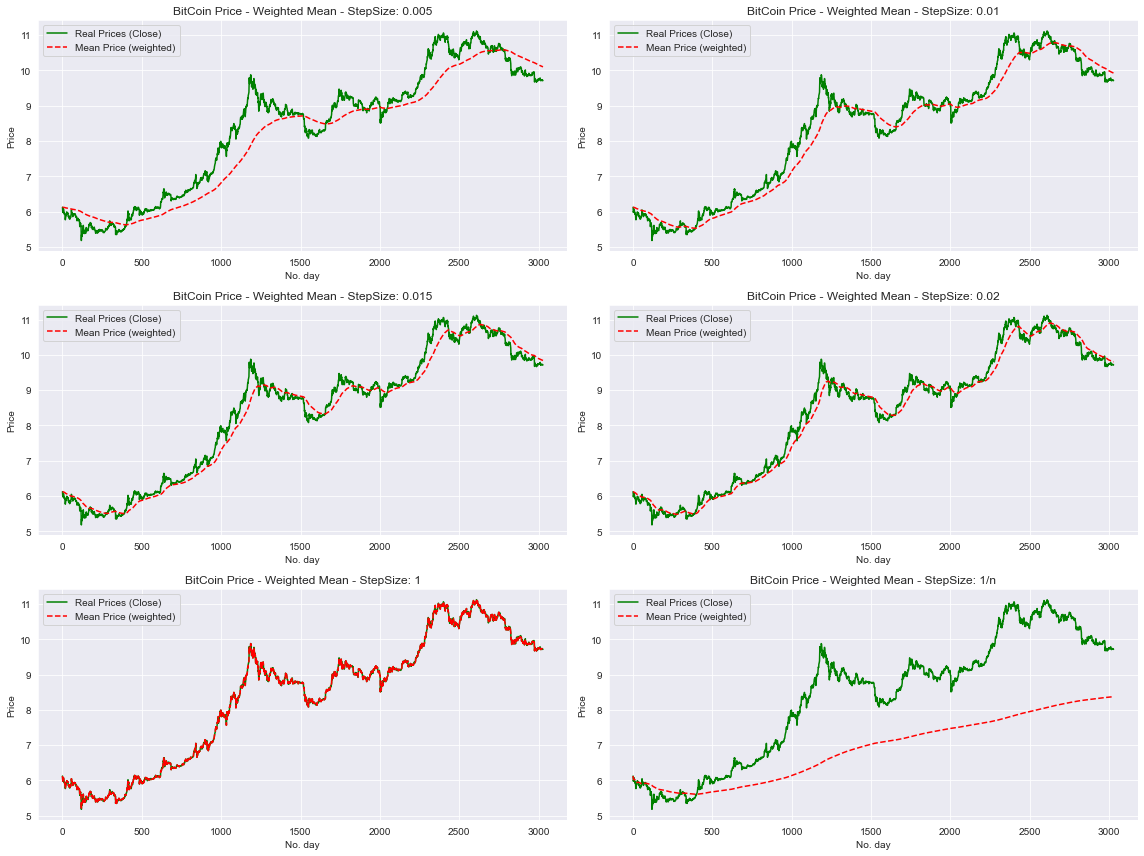

In [83]:
def WeightedMean(alpha=0.01,linear=False):
    global entire_data
    RealValuesPlot = []
    WeightedMeanValuesPlot = []
    CountToNow = 0
    MeanToNow = 0
    
    if linear :
        alpha = 1
        
    for item in entire_data.values():
        new_price = np.log(item["Close"])
        CountToNow += 1 
        
        if linear :
            alpha = 1/CountToNow
        
        if CountToNow == 1 :
            MeanToNow = new_price
        else:
            MeanToNow = new_price*(alpha) + MeanToNow *(1-alpha)
        
        WeightedMeanValuesPlot.append(MeanToNow)
        RealValuesPlot.append(new_price)
        
    plt.plot(RealValuesPlot,"-",label="Real Prices (Close)",color="Green")
    plt.plot(WeightedMeanValuesPlot,"--",label="Mean Price (weighted)",color="Red")
    plt.legend()
    if linear :
        alpha = "1/n"
    plt.title("BitCoin Price - Weighted Mean - StepSize: {0}".format(alpha))
    plt.ylabel("Price")
    plt.xlabel("No. day")
    
 
plt.rcParams["figure.figsize"] = (16,12)   
k = 1

plt.subplot(3,2,k)
k+=1
WeightedMean(0.005)

plt.subplot(3,2,k)
k+=1
WeightedMean(0.01)

plt.subplot(3,2,k)
k+=1
WeightedMean(0.015)

plt.subplot(3,2,k)
k+=1
WeightedMean(0.02)

plt.subplot(3,2,k)
k+=1
WeightedMean(1)

plt.subplot(3,2,k)
k+=1
WeightedMean(linear=True)

plt.tight_layout()
plt.show()
    

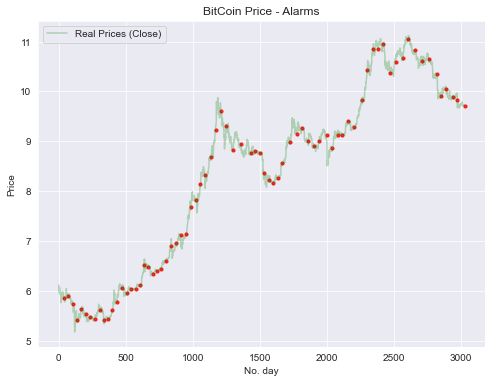

In [84]:
def DistributionChangeDetect(alpha=0.075,linear=False):
    global entire_data
    RealValuesPlot = []
    CountToNow = 0
    MeanToNow = 0
    VarianceToNow = 0
    MeanVarianceToNow = 0
    DetectCount = 0
    I = 0 
    Is = []
    Alarms = []
    
    
    for item in entire_data.values():
        new_price = np.log(item["Close"])
        CountToNow += 1
        I += 1 
        
        if linear :
            alpha = 1/CountToNow
        
        if CountToNow != 1 :
            MeanToNow = new_price*(alpha) + MeanToNow *(1-alpha)
        else:
            MeanToNow = new_price
            
        
        VarianceToNow = ((new_price - MeanToNow)**2 + (VarianceToNow*(CountToNow-1))) / (CountToNow)
        
        past_mean_var = MeanVarianceToNow
        beta = 0.03
        MeanVarianceToNow = MeanVarianceToNow*beta + VarianceToNow * (1-beta)

        change = abs(MeanVarianceToNow - past_mean_var)
        if change >= past_mean_var*0.0001:
            DetectCount += 1 
        else :
            DetectCount = max(0,DetectCount-2)
        
        if DetectCount >= 40:
            DetectCount = DetectCount*1/5
            Alarms.append(new_price)
            Is.append(I)
        
        
        RealValuesPlot.append(new_price)
        
    plt.plot(RealValuesPlot,"-",label="Real Prices (Close)",color="Green",alpha=0.25)
    plt.scatter(Is,Alarms,c="red",alpha=0.8,s=10)
    plt.legend()
    plt.title("BitCoin Price - Alarms")
    plt.ylabel("Price")
    plt.xlabel("No. day")
    plt.show()

plt.rcParams["figure.figsize"] = (8,6)   
DistributionChangeDetect()
    